Importing Libraries

In [346]:
import pandas as pd 
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Loading Main Dataset

In [347]:
df = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Syntecxhub-Internship-Programme\Customer Segmentation\datasets\customer_segmentation.csv')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [348]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [349]:
df.shape

(2240, 29)

In [350]:
df.duplicated().sum()

np.int64(0)

In [351]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [352]:
df.dropna(inplace=True)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [354]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [355]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [356]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [357]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [359]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome'] 

In [360]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [361]:
spend_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts',]

In [362]:
df['Total_Spending'] = df[spend_cols].sum(axis=1)

In [363]:
df['Customer_Since_days'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days

In [364]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Children,Total_Spending,Customer_Since_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1441,4904
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,20,4354
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,713,4553
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,45,4380
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,380,4402


In [365]:
df['Age'] = 2026 - df['Year_Birth']

In [366]:
features_to_exclude = [
    'ID', 'Dt_Customer', 'Year_Birth', 'Kidhome', 'Teenhome', 
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'Z_Revenue', 'Z_CostContact'
]

df_model = df.drop(columns=features_to_exclude, inplace=True)

In [367]:
df.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Children,Total_Spending,Customer_Since_days,Age
0,Graduation,Single,58138.0,58,3,8,10,4,7,0,0,0,0,0,0,1,0,1441,4904,69
1,Graduation,Single,46344.0,38,2,1,1,2,5,0,0,0,0,0,0,0,2,20,4354,72
2,Graduation,Together,71613.0,26,1,8,2,10,4,0,0,0,0,0,0,0,0,713,4553,61
3,Graduation,Together,26646.0,26,2,2,0,4,6,0,0,0,0,0,0,0,1,45,4380,42
4,PhD,Married,58293.0,94,5,5,3,6,5,0,0,0,0,0,0,0,1,380,4402,45


Exploratory Data Analysis

Numerical Variables Distribution

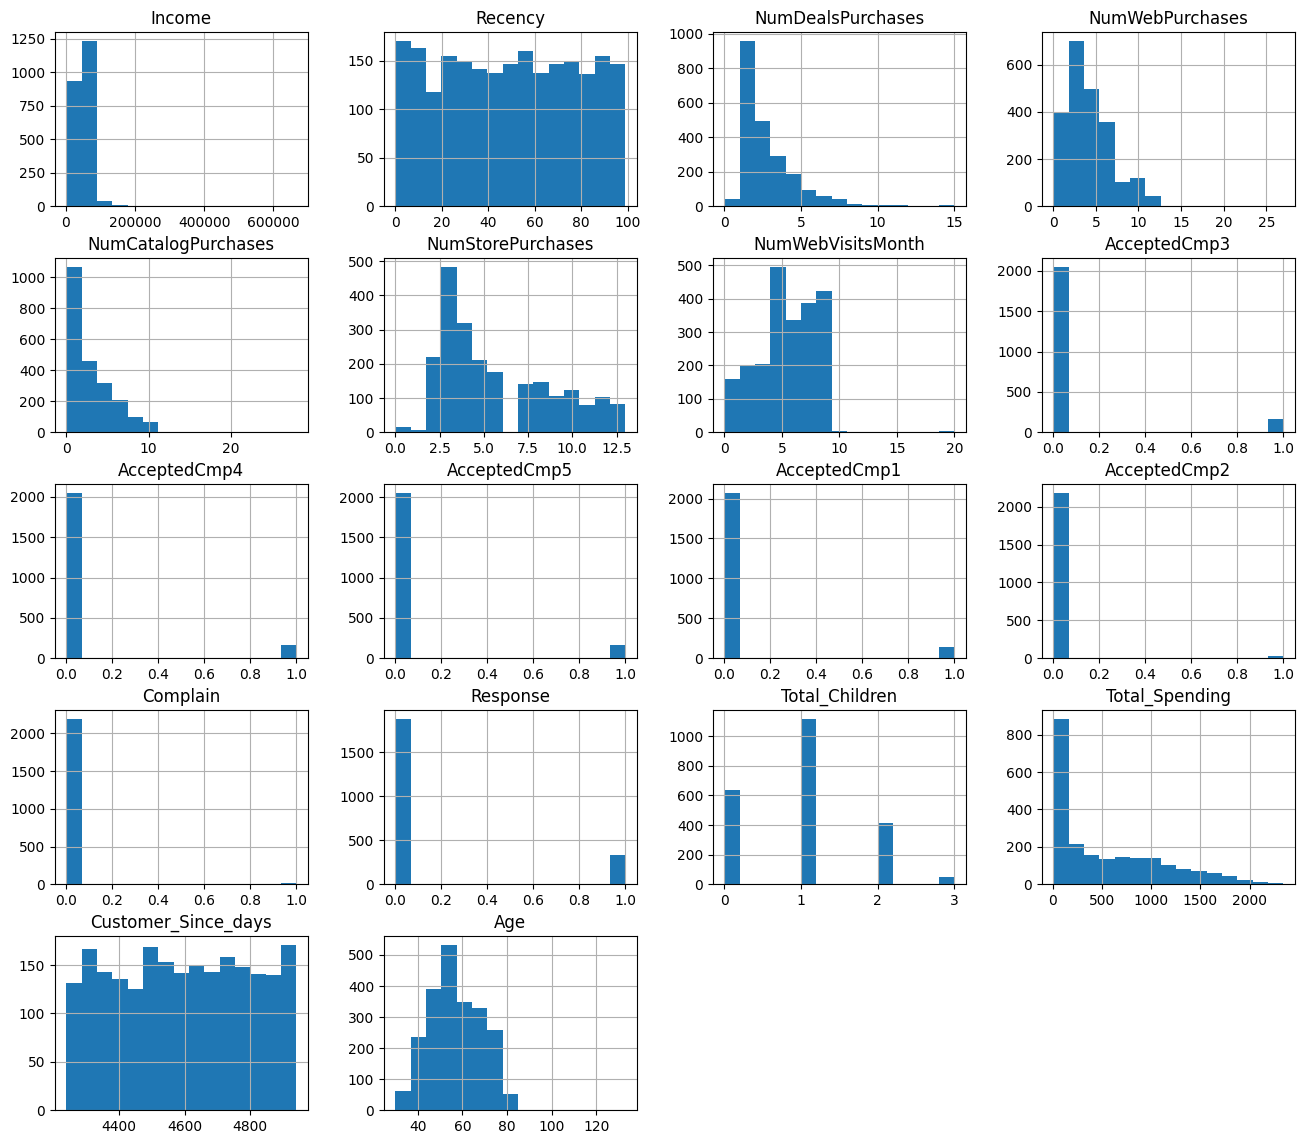

In [368]:
df_num = df._get_numeric_data()
df_num.hist(bins=15, figsize=(16,14))
plt.show()

Categorical Variables Distribution

In [369]:
df_cat = df.select_dtypes(include=['object'])
df_cat.columns

Index(['Education', 'Marital_Status'], dtype='object')

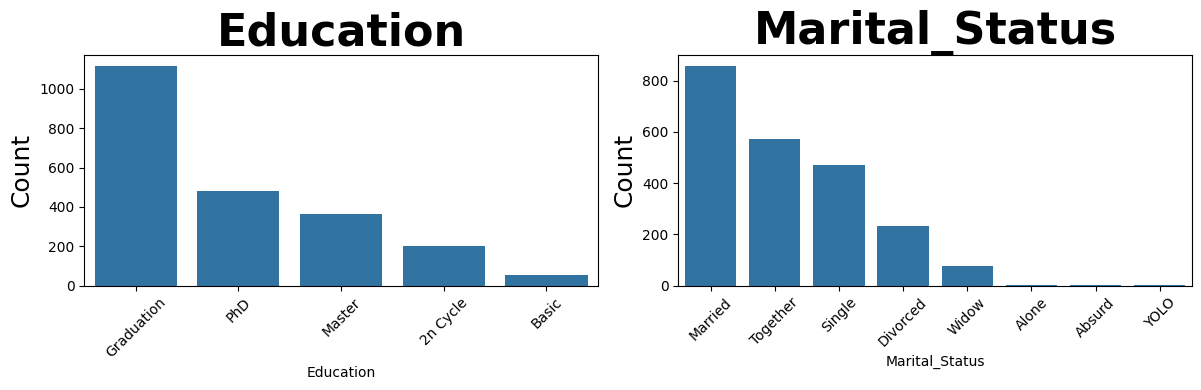

In [370]:
df_cat =['Education', 'Marital_Status']
n_cols = 4
n_rows = (len(df_cat) + n_cols - 1) // n_cols

fig = plt.figure(figsize=(6*n_cols, 4*n_rows))

for i, col in enumerate(df_cat):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10], ax=ax)
    ax.set_title(col, fontsize=32, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.set_ylabel('Count', fontsize=18)

plt.tight_layout()
plt.show()

Feature Correlation

In [371]:
segmentation_features = [
    'Income', 'Age', 'Total_Spending', 'Total_Children', 
    'Recency', 'Customer_Since_days', 'NumWebVisitsMonth'
]

features = df[[
    'Income', 'Age', 'Total_Spending', 'Total_Children', 
    'Recency', 'Customer_Since_days', 'NumWebVisitsMonth'
]].copy()

In [372]:
df_corr = features.corr()
df_corr

,Income,Age,Total_Spending,Total_Children,Recency,Customer_Since_days,NumWebVisitsMonth
Income,1.000000,0.161791,0.664027,-0.293352,-0.003970,-0.018531,-0.553088
Age,0.161791,1.000000,0.116120,0.087398,0.016295,-0.020305,-0.123904
Total_Spending,0.664027,0.116120,1.000000,-0.490884,0.018342,0.151715,-0.489159
Total_Children,-0.293352,0.087398,-0.490884,1.000000,0.018290,-0.025941,0.416076
Recency,-0.003970,0.016295,0.018342,0.018290,1.000000,0.025963,-0.018564
Customer_Since_days,-0.018531,-0.020305,0.151715,-0.025941,0.025963,1.000000,0.276016
NumWebVisitsMonth,-0.553088,-0.123904,-0.489159,0.416076,-0.018564,0.276016,1.000000


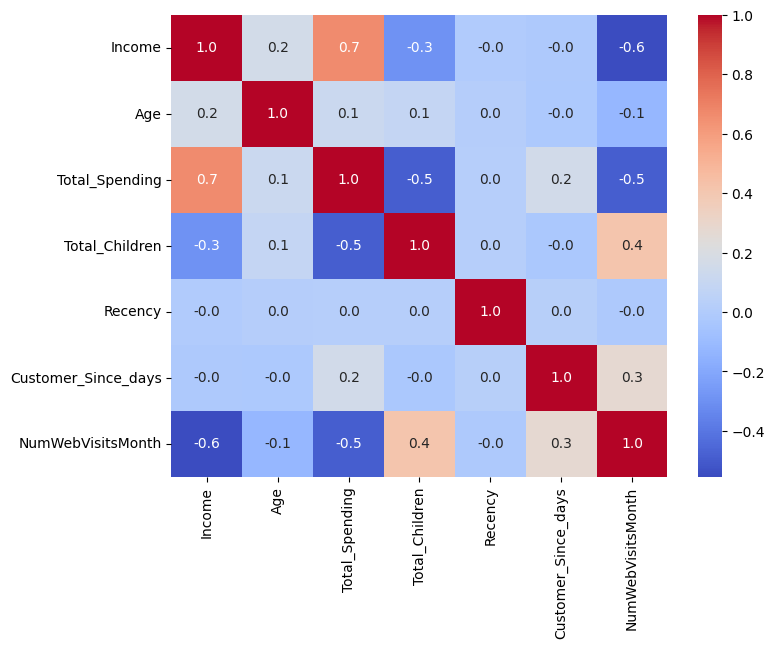

In [373]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df_corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [374]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

In [375]:
x_scaled = pd.DataFrame(x_scaled, columns=segmentation_features)

In [376]:
x_scaled.head()

,Income,Age,Total_Spending,Total_Children,Recency,Customer_Since_days,NumWebVisitsMonth
0,0.234063,0.986443,1.635480,-1.264803,0.310532,1.529129,0.693232
1,-0.234559,1.236801,-0.932725,1.405806,-0.380509,-1.188411,-0.131574
2,0.769478,0.318822,0.319749,-1.264803,-0.795134,-0.205155,-0.543978
3,-1.017239,-1.266777,-0.887542,0.070501,-0.795134,-1.059945,0.280829
4,0.240221,-1.016420,-0.282089,0.070501,1.554407,-0.951244,-0.131574


In [377]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(x_scaled)

In [378]:
wcss = []

In [379]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [380]:
wcss

[11495.719846611915,
 10210.589151784647,
 9590.234534667814,
 8805.06777809112,
 8294.197853888962,
 7619.032272325241,
 7400.481783025117,
 7079.174190187399]

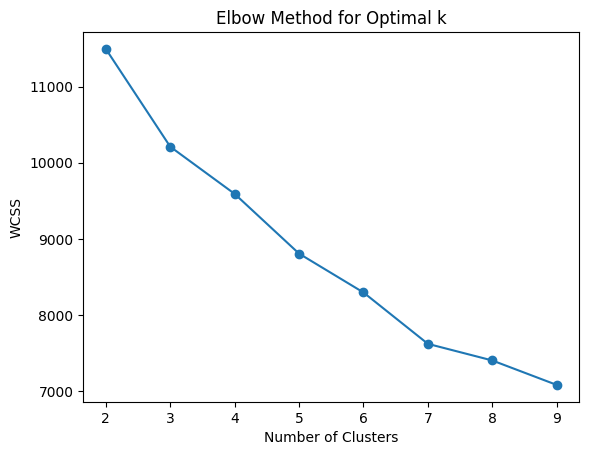

In [381]:
plt.plot(range(2,10),wcss,marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [392]:
kmeans = KMeans(n_clusters=6)
features['Cluster'] = kmeans.fit_predict(x_scaled)

In [393]:
features['Cluster']

0       4
1       3
2       5
3       2
4       3
5       2
6       4
7       0
8       0
9       0
11      0
12      1
13      3
14      0
15      5
16      0
17      4
18      1
19      0
20      0
21      5
22      4
23      2
24      4
25      0
26      2
28      2
29      1
30      2
31      1
32      4
33      4
34      4
35      3
36      5
37      0
38      3
39      4
40      5
41      0
42      4
44      2
45      1
46      0
47      0
49      4
50      2
51      5
52      0
53      5
54      3
55      1
56      5
57      2
59      3
60      5
61      4
62      4
63      4
64      5
65      0
66      2
67      5
68      2
69      3
70      5
72      4
73      3
74      2
75      0
76      5
77      5
78      2
79      4
80      0
81      2
82      0
83      1
84      5
85      3
86      3
87      2
88      1
89      3
93      3
94      3
95      2
96      4
97      4
98      1
99      0
100     2
101     2
102     1
103     1
104     5
105     3
106     2
107     4
108     0


In [394]:
features.head()

,Income,Age,Total_Spending,Total_Children,Recency,Customer_Since_days,NumWebVisitsMonth,PCA1,PCA2,Cluster
0,58138.0,69,1441,0,58,4904,7,1.234225,1.950130,4
1,46344.0,72,20,2,38,4354,5,-0.950709,-1.949706,3
2,71613.0,61,713,0,26,4553,4,1.408492,-0.140316,5
3,26646.0,42,45,1,26,4380,6,-1.290543,-0.747782,2
4,58293.0,45,380,1,94,4402,5,-0.060327,-0.537967,3


In [395]:
cluster_summary = features.groupby('Cluster')[segmentation_features].mean()

In [386]:
cluster_summary

,Income,Age,Total_Spending,Total_Children,Recency,Customer_Since_days,NumWebVisitsMonth
Cluster,,,,,,,
0,47169.226316,60.889474,236.771053,1.400000,75.092105,4448.544737,5.136842
1,79564.012698,61.085714,1072.085714,0.200000,46.282540,4421.831746,2.000000
2,74384.036474,55.805471,1337.702128,0.310030,52.951368,4767.939210,3.765957
3,42192.236453,55.169951,193.435961,1.258621,20.640394,4439.958128,5.623153
4,50752.131646,63.653165,504.686076,1.458228,45.427848,4781.913924,6.812658
5,28499.874680,47.130435,108.148338,0.805627,55.634271,4700.777494,7.652174


In [396]:
features['Cluster'].value_counts()

Cluster
2    416
4    412
0    406
3    374
1    333
5    275
Name: count, dtype: int64

In [397]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x_scaled)
features['PCA1'], features['PCA2'] = pca_data[:,0], pca_data[:,1]

In [398]:
pca_data

array([[ 1.23422486,  1.95012962],
       [-0.95070898, -1.94970614],
       [ 1.40849166, -0.1403161 ],
       ...,
       [ 1.05998946,  0.23399213],
       [ 1.16685172, -1.44096306],
       [-1.20136925,  0.48796309]], shape=(2216, 2))

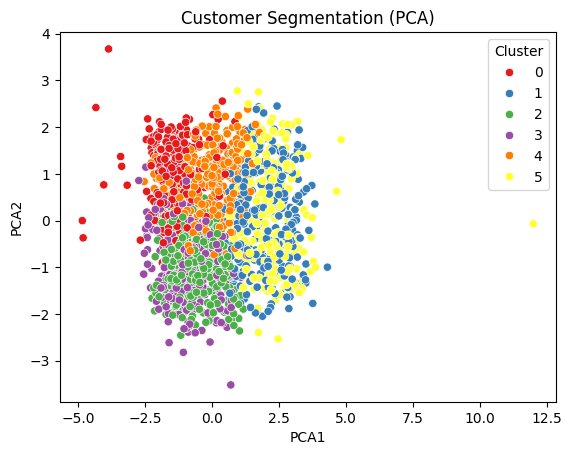

In [399]:
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=features, palette='Set1')
plt.title('Customer Segmentation (PCA)')
plt.show()

In [400]:
cluster_summary

,Income,Age,Total_Spending,Total_Children,Recency,Customer_Since_days,NumWebVisitsMonth
Cluster,,,,,,,
0,29184.302956,47.376847,116.162562,0.862069,55.733990,4712.066502,7.665025
1,74416.957958,61.891892,1125.606607,0.267267,74.597598,4576.684685,2.672673
2,42747.627404,54.713942,190.591346,1.185096,23.050481,4431.716346,5.475962
3,43903.203209,61.267380,170.227273,1.671123,73.524064,4476.141711,5.614973
4,55237.230583,63.834951,686.009709,1.191748,42.211165,4785.169903,6.526699
5,80689.763636,54.145455,1237.745455,0.185455,24.236364,4564.229091,2.610909


In [401]:
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']